In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
class Wave_Processor():
    def __init__(self):
        pass

    def filt(self, wave, fs, lowfre, highfre):
        index = signal.firwin(501, highfre / (fs / 2), pass_zero=True)
        wave1 = np.convolve(wave, index)[250:-250]
        index2 = signal.firwin(501, lowfre / (fs / 2), pass_zero=False)
        filtwave = np.convolve(wave1, index2)[250:-250]
        return filtwave.astype('float32')

    def env(self, wave):
        hilbertwave = signal.hilbert(wave)
        envwave = abs(hilbertwave)
        envwave = envwave - np.mean(envwave)
        return envwave.astype('float32')

    def fft(self, wave, fs):
        frequency = np.arange(0, int(len(wave) / 2), 1) * (fs / len(wave))
        window = signal.hann(len(wave))
        spec_full = abs(np.fft.fft(wave * window) * 4 / len(wave))
        spec = spec_full[range(int(len(wave) / 2))]
        return frequency, spec

    def stft(self, wave, fs, time_duration, return_complex = False):
        frequency, time, spec = signal.stft(wave,
                                            fs,
                                            window='hann',
                                            nperseg=int(time_duration * fs),
                                            noverlap=int(time_duration * fs) - 1)
        if return_complex == False:
            spec = abs(spec * 2)
            return frequency[:-1], time, spec[:-1]
        else:
            return frequency[:-1], time, spec[:-1]

    def __call__(self, index):
        pass
WP = Wave_Processor()

In [3]:
def sin_wave(f, A, base):
    wave = A * np.sin(f * (2 * np.pi) * (base))
    return wave

# 参数

In [4]:
#总参数
total_time = 5
fs = 5120
base = np.arange(0, total_time, 1 / fs)

# 小实验

In [5]:
f = 100.5

resolution_create = 1
resolution_test = 1

dur = 2
line_amount = 80

In [12]:
#
f1 = np.floor(f / resolution_create) * resolution_create
f2 = np.ceil(f / resolution_create) * resolution_create

t_g = 1 / resolution_test

www = 2*(1-(f-f1)/(f2-f1))*sin_wave(f1, 1, base) + 2*((f-f1)/(f2-f1))*sin_wave(f2, 1, base)

#www2 = sin_wave(f, 1, base)

www2 = 1/(WP.env(www)-np.min(WP.env(www))+.000000001)*www

100.0 101.0


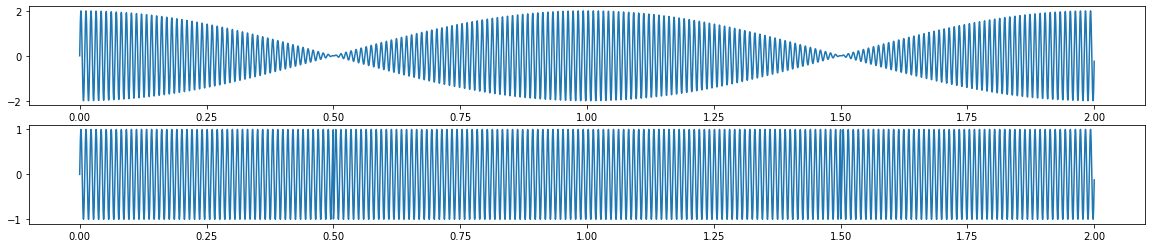

In [13]:
#
print(f1,f2)
%matplotlib inline
plt.figure(figsize=[20, 4])
plt.subplot(211)
plt.plot(base[:int(dur*fs)], www[:int(dur*fs)])
plt.subplot(212)
plt.plot(base[:int(dur*fs)], www2[:int(dur*fs)])
plt.show()

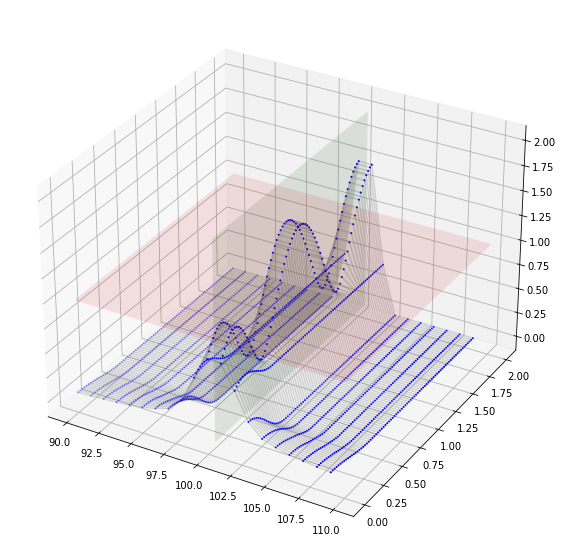

In [16]:
#

ff, tt, ss = WP.stft(www, fs, t_g)

#%matplotlib

plt.figure(figsize=[10, 10])

ax3d = plt.subplot(111, projection='3d')

#垂直辅助面
Y, Z = np.meshgrid(np.linspace(0, dur, 5), np.linspace(0, 2, 5))
X = Y*0 + f
ax3d.plot_surface(X,Y,Z, color = 'g', alpha = 0.1)
#水平辅助面
X, Y = np.meshgrid(np.linspace(100-10/t_g, 100+10/t_g, 5), np.linspace(0, dur, 5))
Z = X*0 + 1
ax3d.plot_surface(X,Y,Z, color = 'r', alpha = 0.1)

for i in range(line_amount):
    X = ff[int((100-10/t_g) * t_g):int((100+10/t_g) * t_g)]
    Y = np.tile(tt[int(i * (fs*dur/line_amount))], [int(20)])
    Z = ss[int((100-10/t_g) * t_g):int((100+10/t_g) * t_g), int(i * (fs*dur/line_amount))]
    ax3d.plot(X, Y, Z, c='gray', alpha=0.3)
    ax3d.scatter(X, Y, Z, s = 1, c = 'b')
#plt.axis('off')
plt.show()

# 探索相位

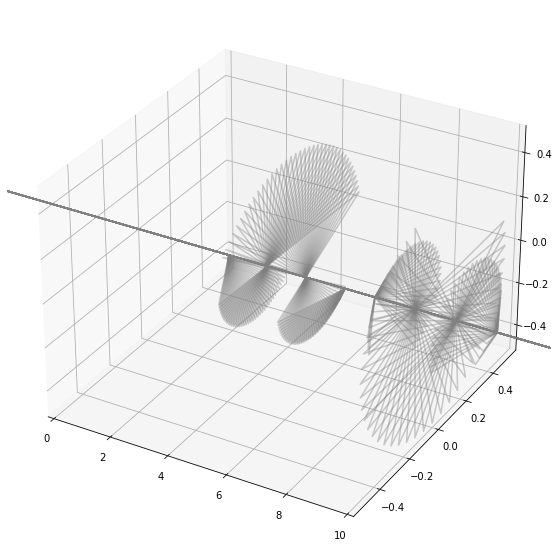

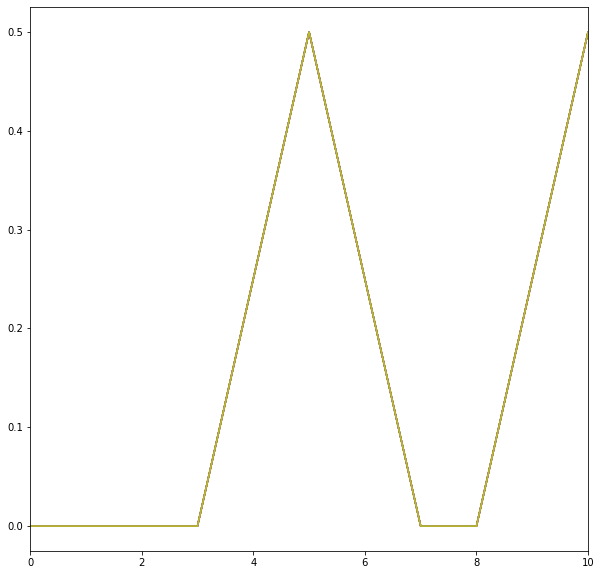

In [19]:
www = sin_wave(5,1,base) + sin_wave(10,1,base)

f_,t_,s_ = signal.stft(www,fs, window='hann',nperseg=int(t_g * fs),noverlap=int(t_g * fs) - 1)

s__ = s_/np.max(2*abs(s_), axis = 0)

t_, www2 = signal.istft(s__, fs, window='hann', nperseg=int(t_g * fs),noverlap=int(t_g * fs) - 1)


plt.figure(figsize=[10, 10])

ax3d = plt.subplot(111, projection='3d')

for i in range(1,40):
    plt.plot(np.arange(len(s_)), s_[:,15120+i*10].real, s_[:,15120+i*10].imag, c = 'gray', alpha = .4)
plt.xlim(0,10)
plt.show()

plt.figure(figsize=[10, 10])
for i in range(1,10):
    plt.plot(abs(s_[:,15120+i]))
plt.xlim(0,10)
plt.show()